<a href="https://colab.research.google.com/github/Ikehub/Class_CODE-MachineLearning-AssignmentTwo/blob/main/Assignment2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assisgment 2 - (350/400 points)

**Total points (350 undergraduate / 400 graduate)**

**Student Name: Ikenna Okonkwo**

**~~Graduate~~ / Undergraduate (select one)**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 for your randomseed/random state. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment2.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 50 extra credit points by doing two simple things (you need to do BOTH):

1) Make nice and pretty plots (only using the provided packages!)

2) Make your GitHub repo professional (this includes your own landing page as well). Examples: https://github.com/abhisheknaiidu/awesome-github-profile-readme


Remember that you will need a portfolio for your job search, and a professional looking repo will certainly impress recruiters/interviewers. So this is more of a favor to yourself! (yes, I follow this myself: https://github.com/jmbanda)


In [1]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Wine dataset from sklearn:

In [2]:
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()

# Question 1 (10 points)

What can you say about the dataset (use code to descirbe it)? any particular things of interest? Find at least two things that you find interesting.

In [3]:
print(wine.data.shape)
print(wine.target_names)

(178, 13)
['class_0' 'class_1' 'class_2']




*   The dataset has 13 features and 178 samples
*   The target is a multi-class label with 3 possible classes for each sample



# Question 2 (10 points)

Remove class_2, so it becomes a binary problem now. Split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [4]:
from sklearn.model_selection import train_test_split

seed=1234
wine_data = wine.data
wine_target = wine.target
mask = (wine_target == 2)
X = wine_data[~mask, :]
y = wine_target[~mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=seed)

# Question 3 (30 points)

Use the perceptron algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [5]:
from sklearn.linear_model import Perceptron

clf_perceptron = Perceptron(random_state=seed)
clf_perceptron.fit(X_train, y_train)
print(f"Model accuracy = {clf_perceptron.score(X_train, y_train) *100:.2f}%")

Model accuracy = 75.00%


# Question 4 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 4, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, clf_perceptron.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        19
           1       0.64      1.00      0.78        27

    accuracy                           0.67        46
   macro avg       0.82      0.61      0.57        46
weighted avg       0.79      0.67      0.60        46





*   Out of all the wines that the models predicted were of class 0, a 100% were correct
*   Out of all the wines that were actually of class 0, the model only predicted class 0 for 21% of these wines
*   The model does a poor job in predicting whether a wine is class 0 or not



# Question 5 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

Confusion matrix: 
[[ 4 15]
 [ 0 27]]


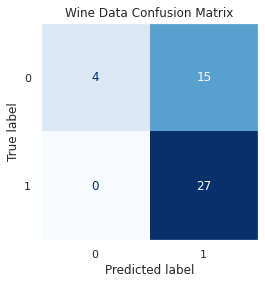

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clf_perceptron.predict(X_test)
fig, ax = plt.subplots()
plt.grid(False)
ax.set_title("Wine Data Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_perceptron.classes_)
cm_display.plot(ax=ax, cmap="Blues", colorbar=False)
print(f"Confusion matrix: \n{cm}")

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Text(0.5, 1.0, 'Test Predictions')

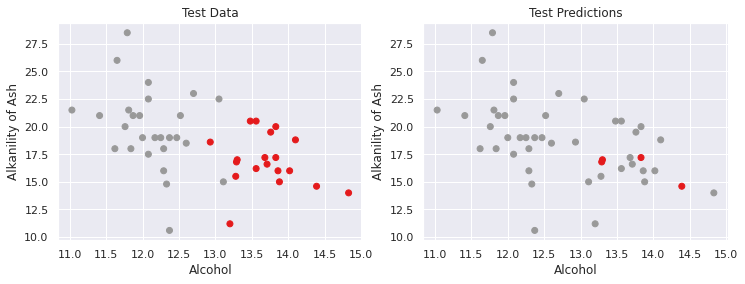

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

alc_index = wine.feature_names.index("alcohol")
ash_index = wine.feature_names.index("alcalinity_of_ash")
print(wine.feature_names)
axs[0].scatter(X_test[:, alc_index], X_test[:, ash_index], c=y_test, cmap="Set1")
axs[0].set_xlabel("Alcohol")
axs[0].set_ylabel("Alkanility of Ash")
axs[0].set_title("Test Data")

axs[1].scatter(X_test[:, alc_index], X_test[:, ash_index], c=y_pred, cmap="Set1")
axs[1].set_xlabel("Alcohol")
axs[1].set_ylabel("Alkanility of Ash")
axs[1].set_title("Test Predictions")

# Question 6 (10 points) 

a) Do the plot right plot on Question 5 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Yes, it matches



*   Model has a precision of 100% when predicting if the wine is of class 0 or not
*   Model has a low recall at predicting class 0 which tells us the model mispredicted a lot of samples that were actually of class 0



# Question 7 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [9]:
X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=seed)

# Question 8 (30 points)

Use the Decision Tree algorithm (with default settings and the correct seed) to build a model on the training set and report the model's accuracy.

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=seed)
tree.fit(X_train, y_train)
tree_accuracy = tree.score(X_train, y_train)
print(f"Accuracy of decision tree classifier = {tree_accuracy*100.0:.2f}%")

Accuracy of decision tree classifier = 100.00%


# Question 9 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 9, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [11]:
print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.92      0.92      0.92        26
           2       0.90      1.00      0.95        18

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63





*   Out of all the wines that the models predicted were of class 1, 92% were correct
*   Out of all the wines that were actually of class 2, the model predicted class 2 for 100% of these wines
*   The model does an excellent job in predicting whether a wine is class 1 or not



# Question 10 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

Confusion matrix: 
[[17  2  0]
 [ 0 24  2]
 [ 0  0 18]]


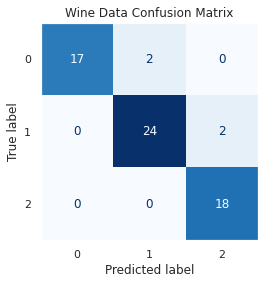

In [12]:
y_pred = tree.predict(X_test)
fig, ax = plt.subplots()
plt.grid(False)
ax.set_title("Wine Data Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
cm_display.plot(ax=ax, cmap="Blues", colorbar=False)
print(f"Confusion matrix: \n{cm}")

Text(0.5, 1.0, 'Test Predictions')

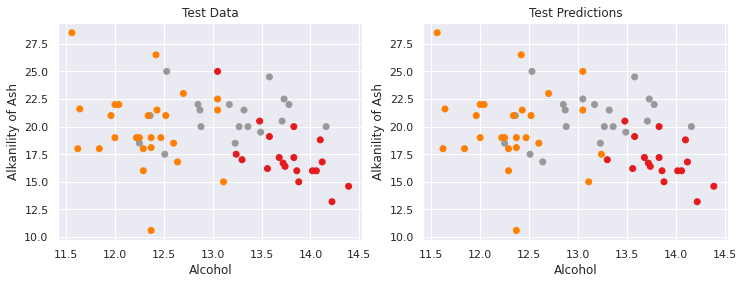

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(X_test[:, alc_index], X_test[:, ash_index], c=y_test, cmap="Set1")
axs[0].set_xlabel("Alcohol")
axs[0].set_ylabel("Alkanility of Ash")
axs[0].set_title("Test Data")

axs[1].scatter(X_test[:, alc_index], X_test[:, ash_index], c=y_pred, cmap="Set1")
axs[1].set_xlabel("Alcohol")
axs[1].set_ylabel("Alkanility of Ash")
axs[1].set_title("Test Predictions")

# Question 11 (30 points) 

a) Do the plot right plot on Question 10 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

c) Plot the figure from question 10 - part 2 using the `visualize_classifier` function given during the class example from 2/20/2023.

Yes



*   Model has a very high accuracy on the test set
*   Model also has a very high precision and recall when predicting all 3 labels



In [ ]:
##### Code block for Question 11 - part c

# Question 12 (10 points)

Reload the Wine dataset and split the dataset into a testing and a training set using 65% of the data for training and the rest for testing. Use the built-in sklearn functionality for this, any other way will not be graded.

In [14]:
X, y = datasets.load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=seed)

# Question 13 (30 points)

Use the Logistic Regression (with as this is a multi-class problem, use the **One Vs Rest algorithm** we must use `liblinear` solver and the correct seed) to build a model on the training set and report the model's accuracy.

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver="liblinear", random_state=seed)
logreg.fit(X_train, y_train)
logreg_accuracy = logreg.score(X_train, y_train)
print(f"Accuracy of model = {logreg_accuracy*100.0:.2f}%")

Accuracy of model = 98.26%


# Question 14 (20 points)

Show the classification report for the built model. In the text cell, following the code block for question 14, descibe what findings can be infered from the classification report. Mention at least 3 observations.

In [16]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.96      0.92      0.94        26
           2       0.90      1.00      0.95        18

    accuracy                           0.95        63
   macro avg       0.95      0.96      0.95        63
weighted avg       0.95      0.95      0.95        63





*   Out of all the wines that the models predicted were of class 2, 90% were correct
*   Out of all the wines that were actually of class 1, the model predicted class 1 for 95% of these wines
*   The model does an excellent job in predicting whether a wine is class 0 or not



# Question 15 (30 points)

Use the trained model to make predictions on the test set. Output AND plot the confusion matrix from the model's predictions. 

In the second code cell, plot side by side: On the left side, the test set and its labels (using features Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending its class label. On the right side, the actual predictions (use the same Alcohol as the X axis and Alcalinity of Ash as the Y axis) with each point colored depending on its class label.

Confusion matrix: 
[[18  1  0]
 [ 0 24  2]
 [ 0  0 18]]


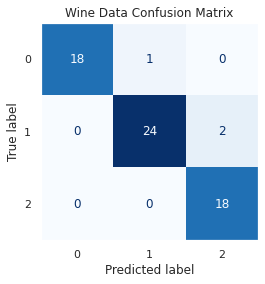

In [17]:
y_pred = logreg.predict(X_test)
fig, ax = plt.subplots()
plt.grid(False)
ax.set_title("Wine Data Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
cm_display.plot(ax=ax, cmap="Blues", colorbar=False)
print(f"Confusion matrix: \n{cm}")

Text(0.5, 1.0, 'Test Predictions')

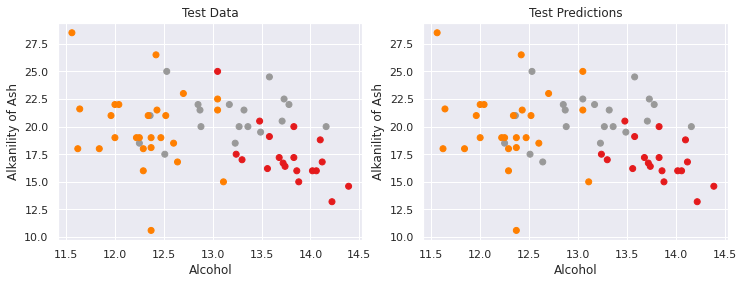

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].scatter(X_test[:, alc_index], X_test[:, ash_index], c=y_test, cmap="Set1")
axs[0].set_xlabel("Alcohol")
axs[0].set_ylabel("Alkanility of Ash")
axs[0].set_title("Test Data")

axs[1].scatter(X_test[:, alc_index], X_test[:, ash_index], c=y_pred, cmap="Set1")
axs[1].set_xlabel("Alcohol")
axs[1].set_ylabel("Alkanility of Ash")
axs[1].set_title("Test Predictions")

# Question 16 (20 points) 

a) Do the plot right plot on Question 15 - part 2 match the confusion matrix of part 1?

b) Any interesting observations from the predictions and the model performance? (write at least 2)

Yes



*   Model has a very high accuracy on the test set
*   Model also has a very high precision and recall when predicting all 3 labels



# Question 17 (10 points)

Create AND display dataframe containing in each row the accruacy, precision, recall for each of the models built. 

In the textual answer cell, discuss which one is the best performing model and why?

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


Textual answer to question 17 goes here.

# Graduate Student Question: (50 points)

Modify the `visualize_classifier` function provided during the 2/20/2023 class to be able to work in 3 dimensions (currently only works in two dimensions). Take the Decision Tree classifier model from Question 8 and plot the separation of the classes using the following axes: (Alcohol as the X axis and Alcalinity of Ash as the Y axis, and Ash as the Z axis).


In [ ]:
##### Code block for Graduate Student Question